## <b>z-DISTRIBUTION<hr style="border:2.5px solid rgba(255, 0, 0, 1)"></hr>

<b>SHEDRACK URI DOJILLO</b><br>
T09<br>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv(r"dataset\transformer-voltage.csv",
                 delimiter=',',
                 index_col=0)
df.head()

,Voltage
Sample,
1,117.0
2,118.3
3,119.5
4,119.5
5,119.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Voltage  30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [7]:
df.describe()

,Voltage
count,30.000000
mean,120.290000
std,1.243285
min,117.000000
25%,119.700000
50%,120.100000
75%,120.500000
max,123.800000


In [10]:
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha/2)
z_critical

1.959963984540054

In [ ]:
pop_std = 5

cl_lower, cl_upper = stats.norm.interval(
    confidence=0.95,
    loc = df['Voltage'].mean(),
    scale = pop_std/np.sqrt(df['Voltage'].count())
)

print("CI =", [cl_lower, cl_upper])

CI = [118.50080585628282, 122.07919414371713]


<function matplotlib.pyplot.show(close=None, block=None)>

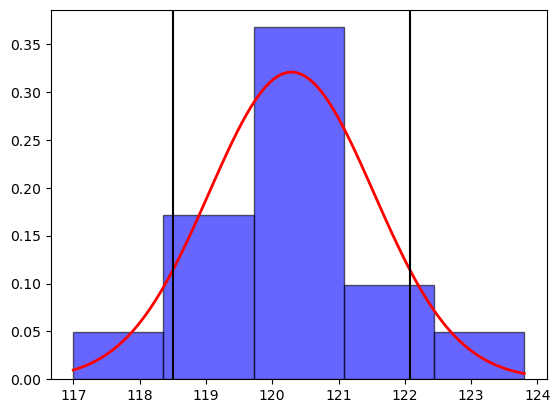

In [ ]:
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

x_min = df['Voltage'].min()
x_max = df['Voltage'].max()

x = np.linspace(x_min, x_max, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p,
         linewidth = 2,
         color="red")

plt.hist(df['Voltage'],
         bins=5,
         density=True,
         edgecolor="black",
         alpha=0.6,
         color="blue")

plt.axvline(x=cl_lower,
            color="black",
            linestyle="-")

plt.axvline(x=cl_upper,
            color="black",
            linestyle="-")
plt.show